In [1]:
import IP

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.ndimage import morphology

In [4]:
I1=IP.imread('Flag6.tiff')
I2=IP.imread('Flag7.tiff')
I3=IP.imread('Flag8.tiff')

In [5]:
I1=uint8(np.around(I1/65535*255))
I2=uint8(np.around(I2/65535*255))
I3=uint8(np.around(I3/65535*255))

In [6]:
I4=IP.imread('Gallery4.tiff')
I5=IP.imread('Gallery6.tiff')
I6=IP.imread('Gallery8.tiff')

In [7]:
I4=uint8(np.around(I4/65535*255))
I5=uint8(np.around(I5/65535*255))
I6=uint8(np.around(I6/65535*255))

In [8]:
I7=IP.imread('Shop7.tiff')
I8=IP.imread('Shop8.tiff')
I9=IP.imread('Shop9.tiff')

In [9]:
I7=uint8(np.around(I7/65535*255))
I8=uint8(np.around(I8/65535*255))
I9=uint8(np.around(I9/65535*255))

In [44]:
I11=IP.imread('Campus6.tiff')
I12=IP.imread('Campus8.tiff')
I13=IP.imread('Campus9.tiff')
I11=uint8(np.around(I11/65535*255))
I12=uint8(np.around(I12/65535*255))
I13=uint8(np.around(I13/65535*255))

In [65]:
I14=IP.imread('Lib6.tiff')
I15=IP.imread('Lib8.tiff')
I16=IP.imread('Lib9.tiff')
I14=uint8(np.around(I14/65535*255))
I15=uint8(np.around(I15/65535*255))
I16=uint8(np.around(I16/65535*255))

In [46]:
I17=IP.imread('Car6.tiff')
I18=IP.imread('Car7.tiff')
I19=IP.imread('Car8.tiff')
I17=uint8(np.around(I17/65535*255))
I18=uint8(np.around(I18/65535*255))
I19=uint8(np.around(I19/65535*255))

In [51]:
I21=IP.imread('Candle5.tiff')
I22=IP.imread('Candle7.tiff')
I23=IP.imread('Candle9.tiff')
I21=uint8(np.around(I21/65535*255))
I22=uint8(np.around(I22/65535*255))
I23=uint8(np.around(I23/65535*255))

In [54]:
I24=IP.imread('Site1.jpg')
I25=IP.imread('Site2.jpg')
I26=IP.imread('Site3.jpg')

In [59]:
I27=IP.imread('Santa2.tiff')
I28=IP.imread('Santa4.tiff')
I29=IP.imread('Santa6.tiff')

In [62]:
I27=uint8(np.around(I27/65535*255))
I28=uint8(np.around(I28/65535*255))
I29=uint8(np.around(I29/65535*255))

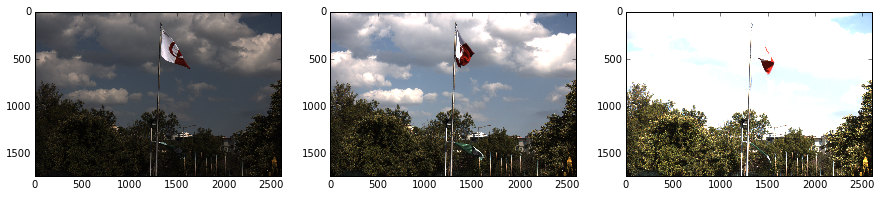

In [10]:
figure(figsize=(15,20))
subplot(131);imshow(I1)
subplot(132);imshow(I2)
subplot(133);imshow(I3)

In [211]:
T1=1/128
T2=1/64
T3=1/32
T4=1/500
T5=1/125
T6=1/30

In [11]:
def mycdf(I):
    nnn,bins=np.histogram(I.flatten(),bins=linspace(0,255,256))
    cdf=np.cumsum(nnn/I.size)
    return(bins,cdf)

In [12]:
def transf(bins1,cdf1,bins2,cdf2):
    transfPXI = np.zeros(len(bins1))
    for i in range(len(cdf1)):
        if cdf1[i]==0:
            transfPXI[i+1]=0
        elif cdf1[i]>=0.99999:
            transfPXI[i+1]=255
        else:
            findi1 = np.where(cdf2>=cdf1[i])
            j = findi1[0][0]
            transfPXI[i+1]=np.around((cdf1[i]-cdf2[j-1])*(bins2[j]-bins2[j-1])/(cdf2[j]-cdf2[j-1])+bins2[j-1])
            #linear interpolation
    for k in range(len(transfPXI)-1):
        ddd=transfPXI[i+1]-transfPXI[i]
        if ddd>=10:
            transfPXI[i+1]=transfPXI[i]
    return(transfPXI)

In [355]:
I1R=I1[:,:,0]
I2R=I2[:,:,0]
I3R=I3[:,:,0]

In [356]:
bins1R,cdf1R=mycdf(I1R) 
bins2R,cdf2R=mycdf(I2R)
bins3R,cdf3R=mycdf(I3R)

In [357]:
bins21=transf(bins2R,cdf2R,bins1R,cdf1R)
bins23=transf(bins2R,cdf2R,bins3R,cdf3R)

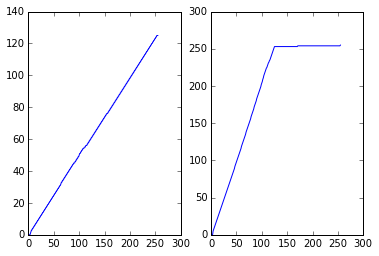

In [358]:
subplot(121);plot(bins2R,bins21)
subplot(122);plot(bins2R,bins23)

In [359]:
bins12=transf(bins1R,cdf1R,bins2R,cdf2R)
bins32=transf(bins3R,cdf3R,bins2R,cdf2R)

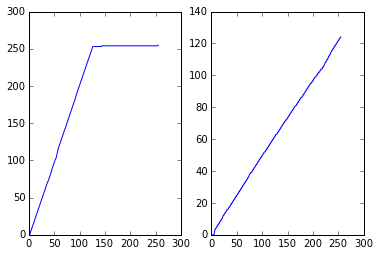

In [360]:
subplot(121);plot(bins1R,bins12)
subplot(122);plot(bins3R,bins32)

In [14]:
def relyweight(z):
    if z<=127:
        w=(z+1)/128
    else:
        w=(256-z)/128
    return(w)

In [15]:
def motiondetect(Iref3,Itest3):
    S=np.zeros(Iref3.shape)
    for l in range(3):   #three channels
        Iref=Iref3[:,:,l]
        Itest=Itest3[:,:,l]
        binsref,cdfref=mycdf(Iref) 
        binstest,cdftest=mycdf(Itest)
        binsRT=transf(binsref,cdfref,binstest,cdftest)
        binsTR=transf(binstest,cdftest,binsref,cdfref)
        height, width = shape(Iref)
        for i in range(height):
            for j in range(width):
                if relyweight(Iref[i,j])>relyweight(Itest[i,j]):
                    S[i,j,l]=(2*binsRT[Iref[i,j]]*Itest[i,j]+1)/(binsRT[Iref[i,j]]**2+Itest[i,j]**2+1)
                else:
                    S[i,j,l]=(2*binsTR[Itest[i,j]]*Iref[i,j]+1)/(binsTR[Itest[i,j]]**2+Iref[i,j]**2+1)
    SS=S[:,:,0]+S[:,:,1]+S[:,:,2]
    return(SS)

In [16]:
SS21=motiondetect(I2,I1)
#SS23=motiondetect(I2,I3)

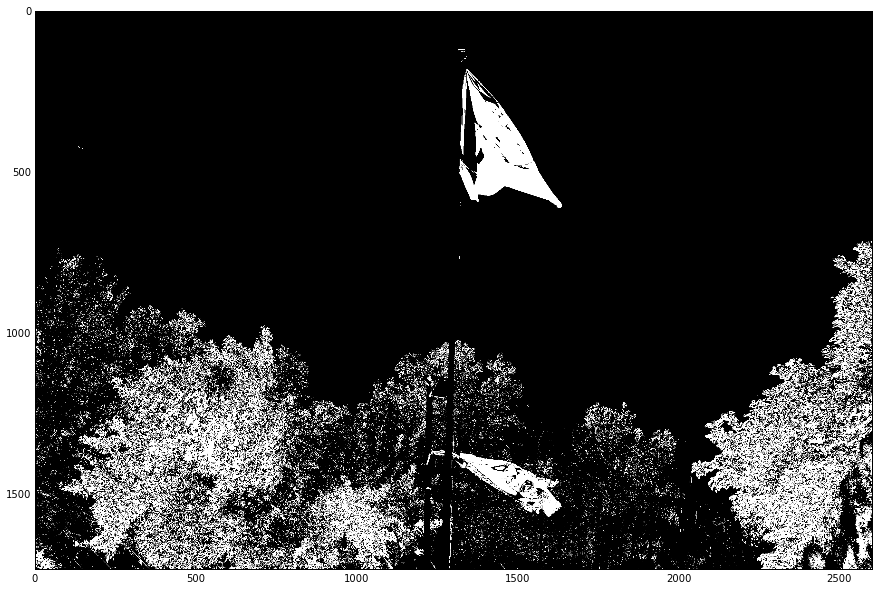

In [17]:
figure(figsize=(15,20))
imshow(SS21<2.9,cmap='gray')
#subplot(122);imshow(SS12<2.5,cmap='gray')

In [18]:
DEC=SS21<2.9

In [23]:
DECD=IP.imdilate(IP.imerode(DEC,IP.disk(5)),IP.disk(10))

In [25]:
DECC=IP.convex_hull_object(DECD)

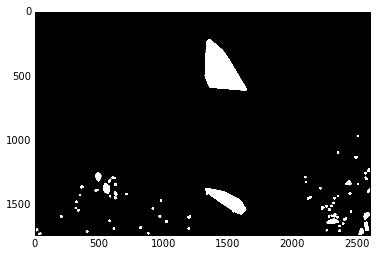

In [26]:
imshow(DECC,cmap='gray')

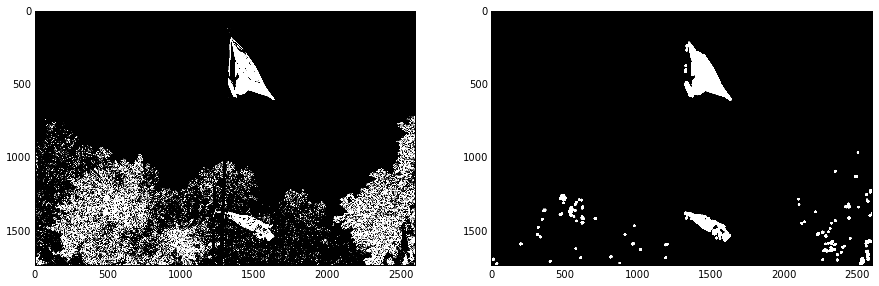

In [24]:
figure(figsize=(15,20))
subplot(121);imshow(DEC,cmap='gray')
subplot(122);imshow(DECD,cmap='gray')

In [27]:
def motionpatch(Iref3,Itest3):
    Itest_up=np.copy(Itest3)
    SSref_test = motiondetect(Iref3,Itest3)
    EStest = IP.convex_hull_object(IP.imdilate(IP.imerode((SSref_test<2.9),IP.disk(5)),IP.disk(17)))
    for l in range(3):   #three channels
        Iref=Iref3[:,:,l]
        Itest=Itest3[:,:,l]
        binsref,cdfref=mycdf(Iref) 
        binstest,cdftest=mycdf(Itest)
        binsRT=transf(binsref,cdfref,binstest,cdftest)
        height, width = shape(EStest)
        for i in range(height):
            for j in range(width):
                if (EStest[i,j]==1):
                #if (EStest[i,j]==1)&(Iref[i,j]<255):
                    Itest_up[i,j,l]=binsRT[Iref[i,j]]
    return(Itest_up)

In [28]:
I1_up=motionpatch(I2,I1)

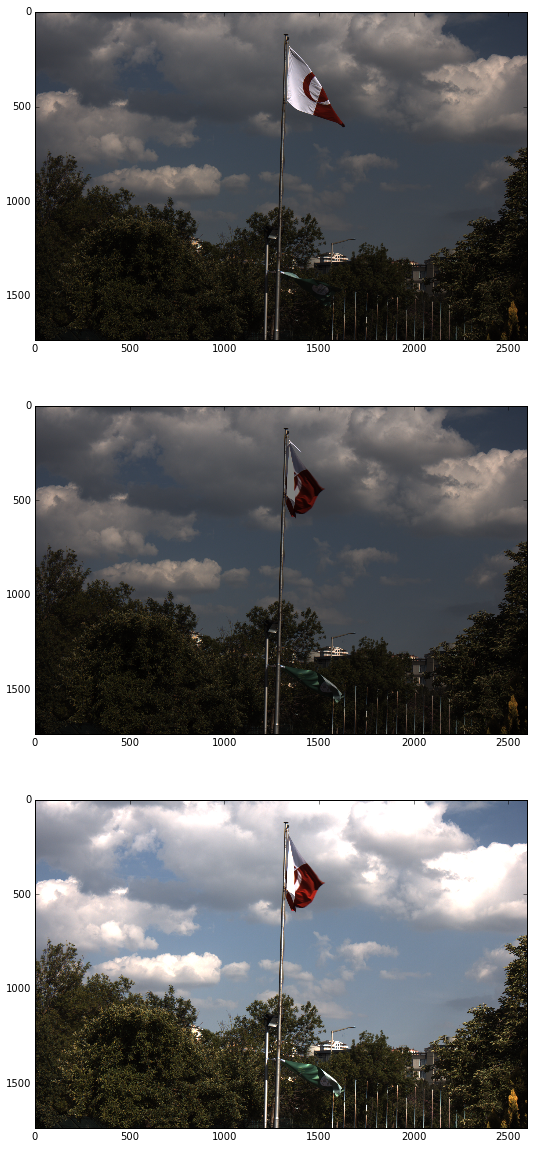

In [30]:
figure(figsize=(45,20))
subplot(311);imshow(I1)
subplot(312);imshow(I1_up)
subplot(313);imshow(I2)

In [29]:
I3_up=motionpatch(I2,I3)

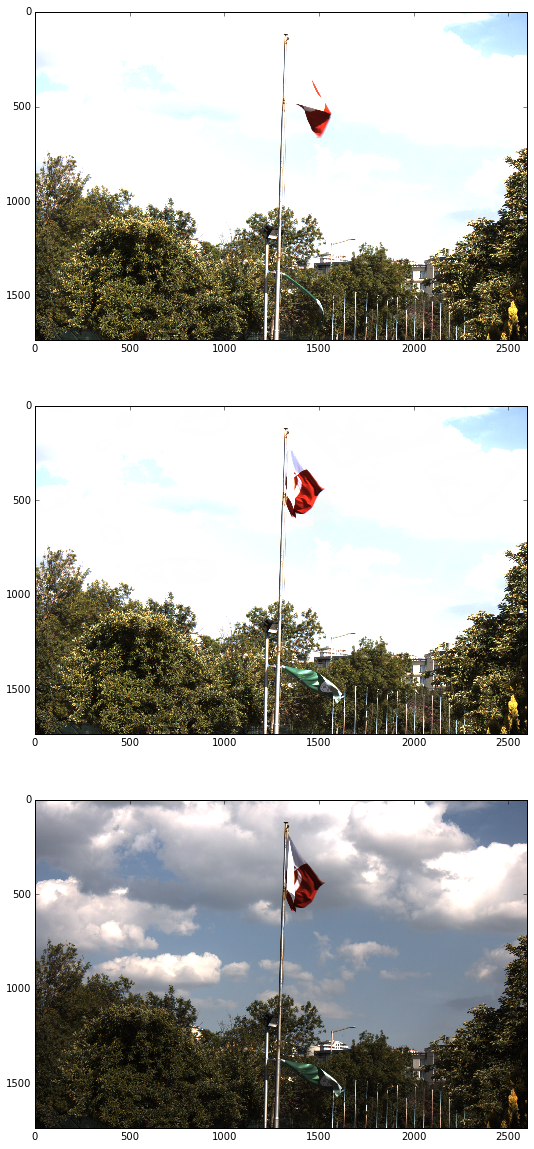

In [31]:
figure(figsize=(45,20))
subplot(311);imshow(I3)
subplot(312);imshow(I3_up)
subplot(313);imshow(I2)

In [32]:
from skimage.io import imsave

In [33]:
imsave('Flag_up_1.jpg',I1_up)

In [34]:
imsave('Flag_up_2.jpg',I2)
imsave('Flag_up_3.jpg',I3_up)

In [35]:
imsave('Flag_old_1.jpg',I1)
imsave('Flag_old_2.jpg',I2)
imsave('Flag_old_3.jpg',I3)

In [36]:
I4_up=motionpatch(I5,I4)
I6_up=motionpatch(I5,I6)

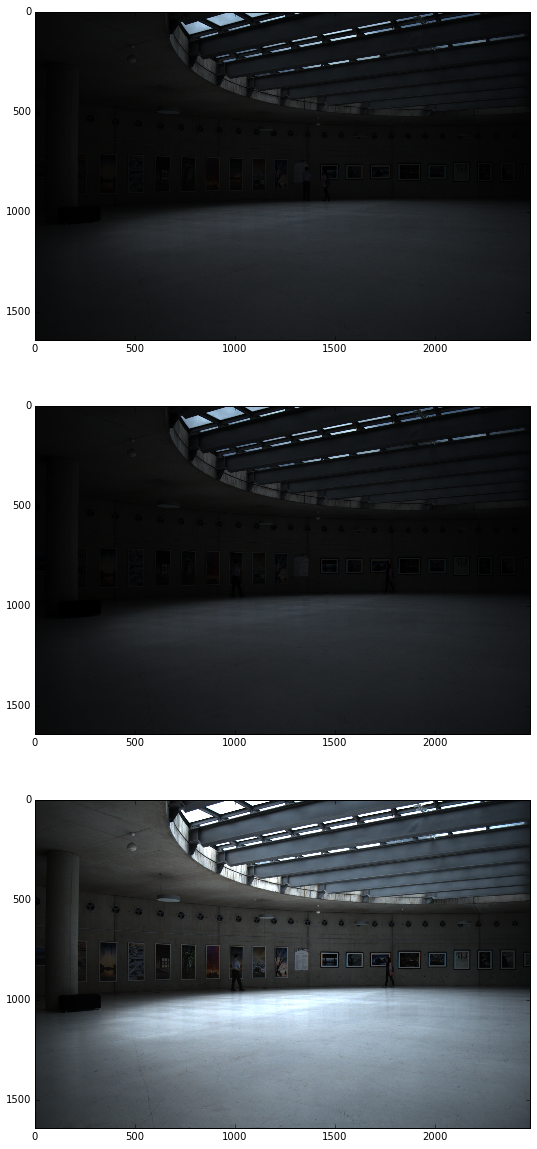

In [39]:
figure(figsize=(45,20))
subplot(311);imshow(I4)
subplot(312);imshow(I4_up)
subplot(313);imshow(I5)

In [37]:
I7_up=motionpatch(I8,I7)
I9_up=motionpatch(I8,I9)

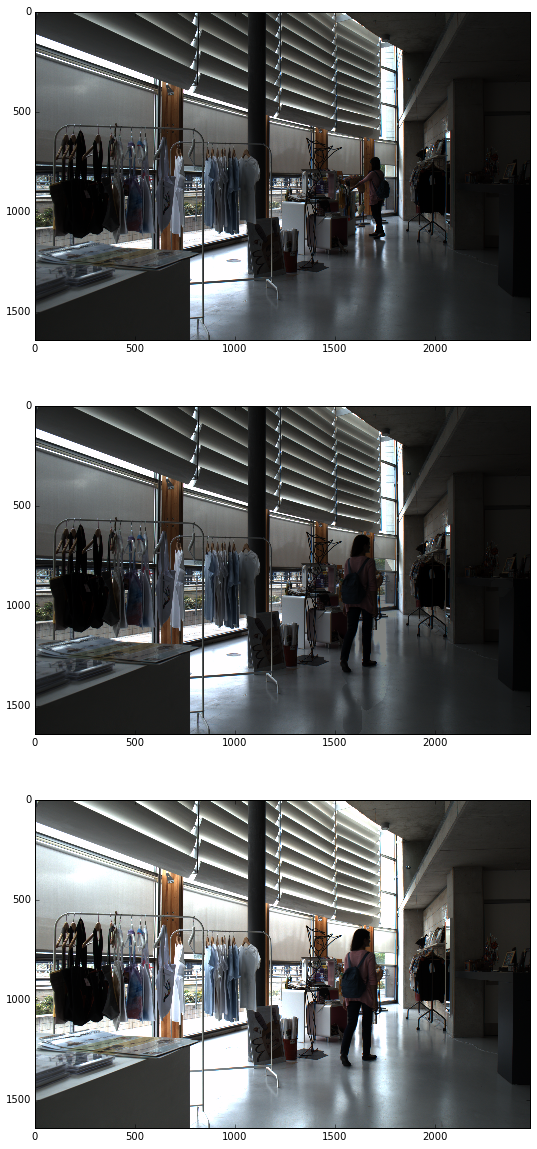

In [41]:
figure(figsize=(45,20))
subplot(311);imshow(I7)
subplot(312);imshow(I7_up)
subplot(313);imshow(I8)

In [42]:
imsave('Gallery_up_1.jpg',I4_up)
imsave('Gallery_up_2.jpg',I5)
imsave('Gallery_up_3.jpg',I6_up)
imsave('Gallery_old_1.jpg',I4)
imsave('Gallery_old_2.jpg',I5)
imsave('Gallery_old_3.jpg',I6)

In [43]:
imsave('Shop_up_1.jpg',I7_up)
imsave('Shop_up_2.jpg',I8)
imsave('Shop_up_3.jpg',I9_up)
imsave('Shop_old_1.jpg',I7)
imsave('Shop_old_2.jpg',I8)
imsave('Shop_old_3.jpg',I9)

In [47]:
I11_up=motionpatch(I12,I11)
I13_up=motionpatch(I12,I13)
I17_up=motionpatch(I18,I17)
I19_up=motionpatch(I18,I19)

In [66]:
I14_up=motionpatch(I15,I14)
I16_up=motionpatch(I15,I16)

In [48]:
imsave('Campus_up_1.jpg',I11_up)
imsave('Campus_up_2.jpg',I12)
imsave('Campus_up_3.jpg',I13_up)
imsave('Campus_old_1.jpg',I11)
imsave('Campus_old_2.jpg',I12)
imsave('Campus_old_3.jpg',I13)

In [67]:
imsave('Lib_up_1.jpg',I14_up)
imsave('Lib_up_2.jpg',I15)
imsave('Lib_up_3.jpg',I16_up)
imsave('Lib_old_1.jpg',I14)
imsave('Lib_old_2.jpg',I15)
imsave('Lib_old_3.jpg',I16)

In [50]:
imsave('Car_up_1.jpg',I17_up)
imsave('Car_up_2.jpg',I18)
imsave('Car_up_3.jpg',I19_up)
imsave('Car_old_1.jpg',I17)
imsave('Car_old_2.jpg',I18)
imsave('Car_old_3.jpg',I19)

In [63]:
I21_up=motionpatch(I22,I21)
I23_up=motionpatch(I22,I23)
I24_up=motionpatch(I25,I24)
I26_up=motionpatch(I25,I26)
I27_up=motionpatch(I28,I27)
I29_up=motionpatch(I28,I29)

In [64]:
imsave('Candle_up_1.jpg',I21_up)
imsave('Candle_up_2.jpg',I22)
imsave('Campus_up_3.jpg',I23_up)
imsave('Candle_old_1.jpg',I21)
imsave('Candle_old_2.jpg',I22)
imsave('Candle_old_3.jpg',I23)
imsave('Site_up_1.jpg',I24_up)
imsave('Site_up_2.jpg',I25)
imsave('Site_up_3.jpg',I26_up)
imsave('Site_old_1.jpg',I24)
imsave('Site_old_2.jpg',I25)
imsave('Site_old_3.jpg',I26)
imsave('Santa_up_1.jpg',I27_up)
imsave('Santa_up_2.jpg',I28)
imsave('Santa_up_3.jpg',I29_up)
imsave('Santa_old_1.jpg',I27)
imsave('Santa_old_2.jpg',I28)
imsave('Santa_old_3.jpg',I29)